### 統計學習與深度學習
### Homework 5

請將IPYNB檔與IPYNB Export之HTML檔上傳至COOL作業區。回答作業時建議使用 "三明治" 答題法。也就是說，先說明要做什麼，然後列出程式碼與結果，最後說明這些結果的意義。作業自己做。嚴禁抄襲。不接受紙本繳交，不接受遲交。請以英文或中文作答。

這個作業將要練習影像分類的問題。影像分類是CNN模型的強項，我們的任務是區分照片中主角穿的上衣類型。這個問題在不同的情境下有不同的難度。在`Dive into Deep Learning`中有類似的問題，但是處理較"乾淨"的影像。這次作業的資料來自街拍影像，因此分類的困難度較高。

我們這次作業的任務，是依照照片中人物的上衣，區分以下類別:
* blazer
* cardigan
* coat
* jacket

下面列出這四個類別的範例訓練資料。

Label =  blazer


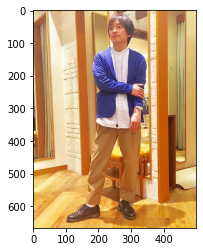

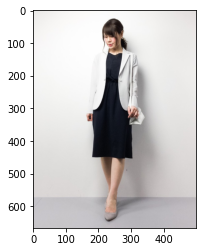

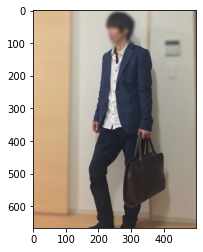

Label =  cardigan


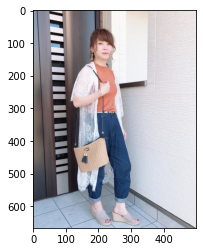

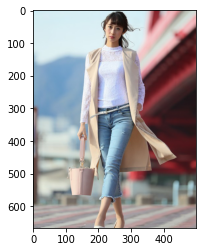

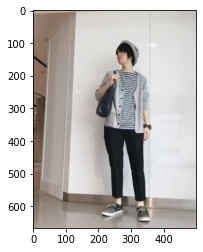

Label =  coat


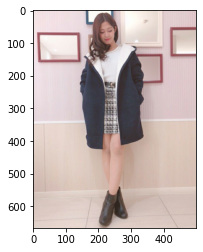

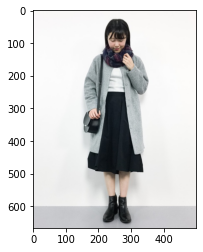

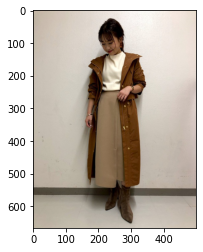

Label =  jacket


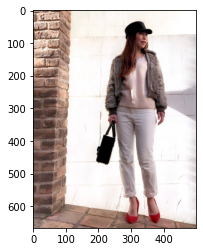

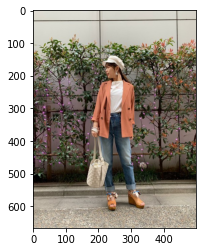

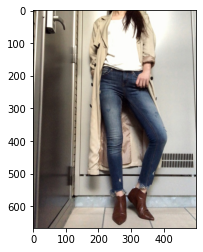

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from PIL import Image
import os
import glob
import random

random.seed(1223)
labels = ['blazer', 'cardigan', 'coat', 'jacket']
for i in range(4):
    print("Label = ", labels[i])
    basepath = os.path.join("photos/train", labels[i], "*.jpg")
    cand_fn = glob.glob(basepath)
    for afn in random.choices(cand_fn, k = 3):    
        img = Image.open(afn)
        plt.imshow(img)
        plt.show()

### 資料
資料在`photos`資料夾。已經區分好訓練(train)、校正(valid)、測試(test)資料。下一層則是依照圖片的標籤分資料夾存放，因此有四個資料夾，分別是blazer, cardigan, coat, jacket。一張圖片只會屬於一個類別。

### Q1
(5%) 列出train, valid, test的總照片數，以及各類別的照片數與比率。在還沒進行模型訓練與評估前，你認為各類別相對的準確率的大小關係為何?

### Q2
(35%) 使用Resnet50建構圖片分類模型。將最後一層的Fully Connected Layer輸出維度改成4以符合本題任務需求。除了最後一層以外，使用torchvision提供的pretrained weights (`torchvision.models.resnet50(pretrained=True)`)初始化模型權重。使用train資料訓練模型，以valid資料決定Early Stopping的Epoch。Early Stopping的Patient參數設為20 Epochs。Batch size設為32。每一個Epoch計算一次Valid Loss，並記錄Valid Loss最低的模型。模型訓練最多200個Epochs。使用最佳模型在test資料計算模型Accuracy, Confusion Matrix, 與Per-class Accuracy。你應該要考慮SGD與ADAM兩種最佳化演算法。調整超參數以達到最好的Valid Loss。

由於圖片的解析度較高，模型訓練前須將解析度調整(Resize)成較短邊為256像素的照片，然後隨機取大小為224x224的影像。接著隨機水平翻轉(Horizontal Flip)、隨機旋轉-20度到20度，並依照Pretrained ResNet的要求調整RGB的均數與標準差。
測試資料(Valid and Test)亦須先將解析度調整(Resize)成較短邊為256像素的照片，然後取圖片中心224x224的影像。

得到Per-Class Accuracy之後，請討論與Q1預期的差異與可能原因。

提示: 
* Pytorch Resnet pretrained model的說明請見 <https://pytorch.org/hub/pytorch_vision_resnet/>
* 本題的Test Accuracy應高於78%。

### Q3
(30%) 使用Resnet50建構圖片分類模型。將最後一層的Fully Connected Layer輸出維度改成4以符合本題任務需求。除了最後一層以外，使用torchvision提供的pretrained weights (`torchvision.models.resnet50(pretrained=True)`)初始化模型權重。模型訓練時固定除了最後一層以外的其他權重。也就是說，模型訓練只會調整最後一層Fully Connected Layer。圖片前處理與前題一致。

使用train訓練模型，以valid決定early stopping的epoch。Early stopping的patient參數為20 epochs。Batch size設為32。紀錄valid loss最低的模型，並在test中計算模型Accuracy, Confusion Matrix, 與Per-class Accuracy。你應該要考慮SGD與ADAM兩種最佳化演算法。調整超參數以達到最好的valid loss。

### Q4
(20%) 使用Resnet50建構圖片分類模型。將最後一層的fully connected layer輸出維度改成4以符合本題任務需求。圖片前處理與前題一致。不使用預訓練權重初始化模型。使用train訓練模型，以valid決定early stopping的epoch。Early stopping的patient參數為20 epochs。Batch size設為32。紀錄valid loss最低的模型，並在test中計算模型Accuracy, Confusion Matrix, 與Per-class Accuracy。你應該要考慮SGD與ADAM兩種最佳化演算法。調整超參數以達到最好的valid loss。

### Q5
(10%) 統整併討論Q2-Q4的預測能力。說明你的觀察。

## Q1


(5%) 列出train, valid, test的總照片數，以及各類別的照片數與比率。在還沒進行模型訓練與評估前，你認為各類別相對的準確率的大小關係為何?

In [2]:
for folder in ['train', 'valid', 'test']:
    blaz, card, coat, jack = 0, 0, 0, 0
    fsum = 0

    for label in labels:
        path = os.path.join("photos/" + folder, label, "*.jpg")
        pnglist = glob.glob(path)
        fsum += len(pnglist)
        
        if label == 'blazer': blaz = len(pnglist)
        elif label == 'cardigan': card = len(pnglist)
        elif label == 'coat': coat = len(pnglist)
        elif label == 'jacket': jack = len(pnglist)

    print(f'{folder}: {fsum} photos')
    print(f'  blazer: {blaz} ({round(blaz/fsum*100)}%)')
    print(f'  cardigan: {card} ({round(card/fsum*100)}%)')
    print(f'  coat: {coat} ({round(coat/fsum*100)}%)')
    print(f'  jacket: {jack} ({round(jack/fsum*100)}%)')
    print('\n')


train: 1041 photos
  blazer: 97 (9%)
  cardigan: 237 (23%)
  coat: 296 (28%)
  jacket: 411 (39%)


valid: 105 photos
  blazer: 7 (7%)
  cardigan: 36 (34%)
  coat: 27 (26%)
  jacket: 35 (33%)


test: 146 photos
  blazer: 9 (6%)
  cardigan: 42 (29%)
  coat: 43 (29%)
  jacket: 52 (36%)




三種資料集裡都是jacket數量最多，blazer數量最少，而cardigan在訓練資料中比coat還少一點，所以根據資料的數量，我認為資料越多的應該會越準，所以我猜測準確率排名為：jacket > coat > cardigan > blazer。

## Q2

(35%) 使用Resnet50建構圖片分類模型。將最後一層的Fully Connected Layer輸出維度改成4以符合本題任務需求。除了最後一層以外，使用torchvision提供的pretrained weights (`torchvision.models.resnet50(pretrained=True)`)初始化模型權重。使用train資料訓練模型，以valid資料決定Early Stopping的Epoch。Early Stopping的Patient參數設為20 Epochs。Batch size設為32。每一個Epoch計算一次Valid Loss，並記錄Valid Loss最低的模型。模型訓練最多200個Epochs。使用最佳模型在test資料計算模型Accuracy, Confusion Matrix, 與Per-class Accuracy。你應該要考慮SGD與ADAM兩種最佳化演算法。調整超參數以達到最好的Valid Loss。

由於圖片的解析度較高，模型訓練前須將解析度調整(Resize)成較短邊為256像素的照片，然後隨機取大小為224x224的影像。接著隨機水平翻轉(Horizontal Flip)、隨機旋轉-20度到20度，並依照Pretrained ResNet的要求調整RGB的均數與標準差。
測試資料(Valid and Test)亦須先將解析度調整(Resize)成較短邊為256像素的照片，然後取圖片中心224x224的影像。

得到Per-Class Accuracy之後，請討論與Q1預期的差異與可能原因。

提示: 
* Pytorch Resnet pretrained model的說明請見 <https://pytorch.org/hub/pytorch_vision_resnet/>
* 本題的Test Accuracy應高於78%。

Import some packages

In [3]:
import os
# import cv2
import time
import random
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
from torchvision.utils import make_grid
from torchvision.models import resnet50 

from PIL import Image

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from torch.optim import Optimizer as optimizer

Get all photos' path

In [4]:
labels = ['blazer', 'cardigan', 'coat', 'jacket']
train_imgs = []
test_imgs = []
valid_imgs = []

for i in range(4):
    basepath = os.path.join("photos/train", labels[i], "*.jpg")
    cand_fn = glob.glob(basepath)
    train_imgs = train_imgs + cand_fn
print(len(train_imgs)) 

for i in range(4):
    basepath = os.path.join("photos/valid", labels[i], "*.jpg")
    cand_fn = glob.glob(basepath)
    valid_imgs = valid_imgs + cand_fn
print(len(valid_imgs))

for i in range(4):
    basepath = os.path.join("photos/test", labels[i], "*.jpg")
    cand_fn = glob.glob(basepath)
    test_imgs = test_imgs + cand_fn
print(len(test_imgs))


1041
105
146


In [5]:
train_imgs[0]

'photos/train/blazer/20191101193003070_500.jpg'

In [6]:
train_imgs[0].split('/')[2]

'blazer'

In [7]:
DIR_TRAIN = "./photos/train/"
DIR_TEST = "./photos/test/"
DIR_VAL = "./photos/valid/"

class_to_int = {"blazer" : 0, "cardigan" : 1, "coat": 2, "jacket": 3}
int_to_class = {0 : "blazer", 1 : "cardigan", 2: "coat", 3: "jacket"}

Photo preprocess

In [8]:
get_train_transform = T.Compose([
    T.Resize(256),
    T.RandomCrop(224),
    T.RandomHorizontalFlip(),
    T.RandomRotation(degrees=20),
    T.ToTensor(),                   
    T.Normalize((0, 0, 0),(1, 1, 1))
])
    
get_val_transform = T.Compose([
    T.Resize(256),
    T.RandomCrop(224),
    T.ToTensor(),
    T.Normalize((0, 0, 0),(1, 1, 1))
])

Dataset Class - for retriving images and labels

In [9]:
class imgDataset(Dataset):
    
    def __init__(self, imgs, class_to_int, mode='train', transforms=None):
        
        super().__init__()
        self.imgs = imgs
        self.class_to_int = class_to_int
        self.mode = mode
        self.transforms = transforms
        
    def __getitem__(self, idx):

        image_path = self.imgs[idx]
        img = Image.open(image_path)
        # img = img.resize((224, 224))

        # plt.imshow(img)
        # plt.show()
        
        ### Preparing class label
        label_list = [0, 0, 0, 0]
        label_int = self.class_to_int[image_path.split('/')[2]] 
        label_list[label_int] = 1
        label = torch.FloatTensor(label_list)
        # print(label)

        ### Apply Transforms on image
        transform_img = self.transforms(img)

        return transform_img, label
        
        
    def __len__(self):
        return len(self.imgs)

DataLoader

In [10]:
train_dataset = imgDataset(train_imgs, class_to_int, mode='train', transforms=get_train_transform)
valid_dataset = imgDataset(valid_imgs, class_to_int, mode='valid', transforms=get_val_transform)
test_dataset = imgDataset(test_imgs, class_to_int, mode='test', transforms=get_val_transform)

train_data_loader = DataLoader(
    dataset = train_dataset,
    # num_workers = 1,
    batch_size = 32,
    shuffle = True
)

valid_data_loader = DataLoader(
    dataset = valid_dataset,
    # num_workers = 1,
    batch_size = 32,
    shuffle = True
)

test_data_loader = DataLoader(
    dataset = test_dataset,
    # num_workers = 1,
    batch_size = 32,
    shuffle = True
)

Check preprocess result of training data

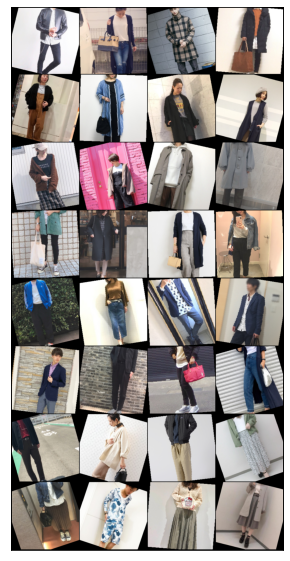

In [11]:
for images, labels in train_data_loader:
    
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, 4).permute(1,2,0))
    plt.show()
    break

In [12]:
# GPU or cpu
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


One Epoch Train

In [13]:
def train_one_epoch(train_data_loader):
    
    ### Local Parameters
    epoch_loss = []
    start_time = time.time()
    
    ###Iterating over data loader
    for images, labels in train_data_loader:
        
        #Loading images and labels to device
        images = images.to(device)
        labels = labels.to(device)
        labels = labels.reshape((labels.shape[0], 4)) # [N, 4] - to match with preds shape
        
        #Reseting Gradients (reset)
        optimizer.zero_grad()
        
        #Forward
        preds = model(images)
        
        #Calculating Loss
        _loss = criterion(preds, labels)
        loss = _loss.item()
        epoch_loss.append(loss)
        
        #Backward (update)
        _loss.backward()
        optimizer.step()
    
    ###Overall Epoch Results
    end_time = time.time()
    total_time = end_time - start_time
    
    ###Loss
    epoch_loss = np.mean(epoch_loss)
    
    ###Storing results to logs
    train_logs["loss"].append(epoch_loss)
    train_logs["time"].append(total_time)
        
    return epoch_loss, total_time

One Epoch Valid

In [14]:
def valid_one_epoch(valid_data_loader, best_val_loss, best_path):
    
    ### Local Parameters
    epoch_loss = []
    start_time = time.time()
    
    ###Iterating over data loader
    for images, labels in valid_data_loader:
        
        #Loading images and labels to device
        images = images.to(device)
        labels = labels.to(device)
        labels = labels.reshape((labels.shape[0], 4)) # [N, 4] - to match with preds shape
        
        #Forward
        preds = model(images)
        
        #Calculating Loss
        _loss = criterion(preds, labels)
        loss = _loss.item()
        epoch_loss.append(loss)
        
    
    ###Overall Epoch Results
    end_time = time.time()
    total_time = end_time - start_time
    
    ###Acc and Loss
    ep_loss = np.mean(epoch_loss)
    
    ###Storing results to logs
    val_logs["loss"].append(ep_loss)
    val_logs["time"].append(total_time)
    
    ###Saving best model
    if ep_loss < best_val_loss:
        best_val_loss = ep_loss
        torch.save(model.state_dict(), best_path)
        
    return ep_loss, total_time, best_val_loss

In [18]:
### if device is cuda
model = resnet50(pretrained = True)

### if device is cpu
# from torchvision.models import ResNet50_Weights
# model = resnet50(weights=ResNet50_Weights.DEFAULT)

model.fc = nn.Sequential(
    # nn.Dropout(p=0.5),
    nn.Linear(2048, 4, bias = True), # out-dimension = 4
    nn.Sigmoid()
)

In [15]:
def model_fit (epochs, BEST_PATH):
    best_val_loss = 10000
    early_stop_count = 0
    for epoch in range(epochs):

        if early_stop_count >= 20:
            print("Early Stop!")
            break
        
        # training
        train_loss, train_time = train_one_epoch(train_data_loader)
        
        # validation
        valid_loss, valid_time, best_val_loss = valid_one_epoch(valid_data_loader, best_val_loss, BEST_PATH)

        if valid_loss > best_val_loss:
            early_stop_count += 1
        else: # valid loss is improved
            early_stop_count = 0
        
        #Print Epoch Details
        print("Epoch {}".format(epoch+1))
        print("training Loss : {}".format(round(train_loss, 4)))
        print("validating Loss : {}".format(round(valid_loss, 4)))
        print("best valid loss : {} \n".format(round(best_val_loss, 4)))
    

Adam algorithm

In [20]:
# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

# Learning Rate Scheduler
# lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 3, gamma = 0.5)

#Loss Function
criterion = nn.BCELoss() 

# Logs - Helpful for plotting after training finishes
train_logs = {"loss" : [], "time" : []}
val_logs = {"loss" : [], "time" : []}

# path to save model
BEST_PATH = '2-adam_best.pth'

# Loading model to device
model.to(device)

# Number of epochs 
epochs = 200

# train and valid
model_fit(epochs, BEST_PATH)

Epoch 1
training Loss : 0.5051
validating Loss : 0.4031
best valid loss : 0.4031 

Epoch 2
training Loss : 0.3305
validating Loss : 0.3379
best valid loss : 0.3379 

Epoch 3
training Loss : 0.226
validating Loss : 0.3267
best valid loss : 0.3267 

Epoch 4
training Loss : 0.1602
validating Loss : 0.3132
best valid loss : 0.3132 

Epoch 5
training Loss : 0.1214
validating Loss : 0.2805
best valid loss : 0.2805 

Epoch 6
training Loss : 0.0839
validating Loss : 0.3421
best valid loss : 0.2805 

Epoch 7
training Loss : 0.0833
validating Loss : 0.4347
best valid loss : 0.2805 

Epoch 8
training Loss : 0.07
validating Loss : 0.46
best valid loss : 0.2805 

Epoch 9
training Loss : 0.0804
validating Loss : 0.3597
best valid loss : 0.2805 

Epoch 10
training Loss : 0.0713
validating Loss : 0.4048
best valid loss : 0.2805 

Epoch 11
training Loss : 0.0557
validating Loss : 0.307
best valid loss : 0.2805 

Epoch 12
training Loss : 0.0495
validating Loss : 0.3338
best valid loss : 0.2805 

Epoch 1

SGD Algorithm

In [21]:
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)

# path to save model
BEST_PATH = '2-sgd_best.pth'

model.to(device)

model_fit(epochs, BEST_PATH)

Epoch 1
training Loss : 0.0127
validating Loss : 0.4473
best valid loss : 0.4473 

Epoch 2
training Loss : 0.0196
validating Loss : 0.4164
best valid loss : 0.4164 

Epoch 3
training Loss : 0.0158
validating Loss : 0.495
best valid loss : 0.4164 

Epoch 4
training Loss : 0.0235
validating Loss : 0.3675
best valid loss : 0.3675 

Epoch 5
training Loss : 0.0202
validating Loss : 0.5567
best valid loss : 0.3675 

Epoch 6
training Loss : 0.0214
validating Loss : 0.3792
best valid loss : 0.3675 

Epoch 7
training Loss : 0.0217
validating Loss : 0.3847
best valid loss : 0.3675 

Epoch 8
training Loss : 0.0184
validating Loss : 0.3699
best valid loss : 0.3675 

Epoch 9
training Loss : 0.0181
validating Loss : 0.6222
best valid loss : 0.3675 

Epoch 10
training Loss : 0.0108
validating Loss : 0.5294
best valid loss : 0.3675 

Epoch 11
training Loss : 0.0181
validating Loss : 0.5723
best valid loss : 0.3675 

Epoch 12
training Loss : 0.0229
validating Loss : 0.4712
best valid loss : 0.3675 

Ep

adam的valid loss比較低，所以用adam的最佳模型來預測

In [16]:
# assign max value to 1, else 0
t = torch.tensor([[0.1, 0.2, 0.3], [0.6, 0.2, 0.3], [0.1, 0.3, 0.1]])
a = t.argmax(1)
m = torch.zeros (t.shape).scatter (1, a.unsqueeze (1), 1.0)
m

tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.]])

In [17]:
# GPU or cpu
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


In [18]:
def model_predict (test_data_loader):
    pred_list = []
    true_list = []
    
    for images, labels in test_data_loader:
        # loading images and labels to device
        # images = images.to(device)
        # labels = labels.to(device)
        labels = labels.reshape((labels.shape[0], 4)) # [N, 4] - to match with preds shape
          
        preds = model(images)
        # preds = preds.to('cpu')
        a = preds.argmax(1)
        preds_out = torch.zeros (preds.shape).scatter(1, a.unsqueeze (1), 1.0)
           
        pred_list = pred_list + preds_out.tolist()
        true_list = true_list + labels.tolist()

    return np.array(pred_list), np.array(true_list)

Load the best model and predict test data

In [19]:
### if device is cuda
model = resnet50(pretrained = True)

### if device is cpu
# from torchvision.models import ResNet50_Weights
# model = resnet50(weights=ResNet50_Weights.DEFAULT)

model.fc = nn.Sequential(
    # nn.Dropout(p=0.5),
    nn.Linear(2048, 4, bias = True), # out-dimension = 4
    nn.Sigmoid()
)

PATH = '2-adam_best.pth'

# model.to(device)
# model.load_state_dict(torch.load(PATH, map_location='cpu')) # if cpu
model.load_state_dict(torch.load(PATH)) # if cuda
model.eval()
preds, trues = model_predict(test_data_loader)

print(preds.shape)

(146, 4)


### Q2 Answer

In [20]:
from sklearn.metrics import multilabel_confusion_matrix

'''confusion matrix下面一列的總和即為測試資料中為true的個數'''
label_list = ['blazer', 'cardigan', 'coat', 'jacket']
cfmtx = multilabel_confusion_matrix(trues, preds)
print('Confusion matrix:\n')

for i in range(4):
     print(label_list[i])
     print(cfmtx[i], '\n')


Confusion matrix:

blazer
[[130   7]
 [  1   8]] 

cardigan
[[95  9]
 [19 23]] 

coat
[[96  7]
 [ 6 37]] 

jacket
[[78 16]
 [13 39]] 



In [21]:
test_tp = 0
test_tn = 0
test_sum = 0
i = 0
print('Per-class Accuracy:')

for m in multilabel_confusion_matrix(trues, preds):
    
    tp = m[0, 0]
    fp = m[0, 1]
    fn = m[1, 0]
    tn = m[1, 1]

    test_tp += tp
    test_tn += tn
    test_sum += (tp+fp+fn+tn)

    if i == 0: print(f'  blazer: {(tp+tn)/(tp+fp+fn+tn)}')
    elif i == 1: print(f'  cardigan: {(tp+tn)/(tp+fp+fn+tn)}')
    elif i == 2: print(f'  coat: {(tp+tn)/(tp+fp+fn+tn)}')
    else: print(f'  jacket: {(tp+tn)/(tp+fp+fn+tn)}')

    i += 1

print(f'\nTest Accuracy: {(test_tp + test_tn) / test_sum}')

Per-class Accuracy:
  blazer: 0.9452054794520548
  cardigan: 0.8082191780821918
  coat: 0.910958904109589
  jacket: 0.8013698630136986

Test Accuracy: 0.8664383561643836


Per-class的預測結果準確度排名為：blazer > coat > cardigan > jacket，最大跟最小的剛好與預期相反，而且前兩名與後兩名差異不小。我認為是因為blazer的訓練資料數量很少，所以模型學到這一項幾乎都要標0，而且測試資料也很少blazer，所以猜錯機率比較低，jacket可能因為資料比較多，較容易猜錯，因此準確度最低。

## Q3

(30%) 使用Resnet50建構圖片分類模型。將最後一層的Fully Connected Layer輸出維度改成4以符合本題任務需求。除了最後一層以外，使用torchvision提供的pretrained weights (`torchvision.models.resnet50(pretrained=True)`)初始化模型權重。模型訓練時固定除了最後一層以外的其他權重。也就是說，模型訓練只會調整最後一層Fully Connected Layer。圖片前處理與前題一致。

使用train訓練模型，以valid決定early stopping的epoch。Early stopping的patient參數為20 epochs。Batch size設為32。紀錄valid loss最低的模型，並在test中計算模型Accuracy, Confusion Matrix, 與Per-class Accuracy。你應該要考慮SGD與ADAM兩種最佳化演算法。調整超參數以達到最好的valid loss。

Adam

In [23]:
### if device is cuda
model = resnet50(pretrained = True)

### if device is cpu
# from torchvision.models import ResNet50_Weights
# model = resnet50(weights=ResNet50_Weights.DEFAULT)

for param in model.parameters(): # fix weights
    param.requires_grad = False

# parameters of newly constructed modules have requires_grad=True by default
model.fc = nn.Sequential(
    nn.Linear(2048, 4, bias = True), # out-dimension = 4
    nn.Sigmoid()
)

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

#Loss Function
criterion = nn.BCELoss() 

# path to save model
BEST_PATH = '3-adam_best.pth'

# Logs - Helpful for plotting after training finishes
train_logs = {"loss" : [], "time" : []}
val_logs = {"loss" : [], "time" : []}

# Loading model to device
model.to(device)

# No of epochs 
epochs = 200

# train and valid
model_fit(epochs, BEST_PATH)

Epoch 1
training Loss : 0.5651
validating Loss : 0.548
best valid loss : 0.548 

Epoch 2
training Loss : 0.524
validating Loss : 0.5327
best valid loss : 0.5327 

Epoch 3
training Loss : 0.5194
validating Loss : 0.5286
best valid loss : 0.5286 

Epoch 4
training Loss : 0.514
validating Loss : 0.526
best valid loss : 0.526 

Epoch 5
training Loss : 0.5089
validating Loss : 0.5188
best valid loss : 0.5188 

Epoch 6
training Loss : 0.5063
validating Loss : 0.5166
best valid loss : 0.5166 

Epoch 7
training Loss : 0.4996
validating Loss : 0.4993
best valid loss : 0.4993 

Epoch 8
training Loss : 0.4982
validating Loss : 0.4899
best valid loss : 0.4899 

Epoch 9
training Loss : 0.4928
validating Loss : 0.5149
best valid loss : 0.4899 

Epoch 10
training Loss : 0.4898
validating Loss : 0.4998
best valid loss : 0.4899 

Epoch 11
training Loss : 0.4813
validating Loss : 0.49
best valid loss : 0.4899 

Epoch 12
training Loss : 0.4829
validating Loss : 0.5016
best valid loss : 0.4899 

Epoch 13


SGD

In [24]:
### if device is cuda
model = resnet50(pretrained = True)

### if device is cpu
# from torchvision.models import ResNet50_Weights
# model = resnet50(weights=ResNet50_Weights.DEFAULT)

for param in model.parameters(): # fix weights
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
model.fc = nn.Sequential(
    nn.Linear(2048, 4, bias = True), # out-dimension = 4
    nn.Sigmoid()
)

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)

#Loss Function
criterion = nn.BCELoss() 

# path to save model
BEST_PATH = '3-sgd_best.pth'

# Logs - Helpful for plotting after training finishes
train_logs = {"loss" : [], "time" : []}
val_logs = {"loss" : [], "time" : []}

# Loading model to device
model.to(device)

# No of epochs 
epochs = 200

# train and valid
model_fit(epochs, BEST_PATH)

Epoch 1
training Loss : 0.6727
validating Loss : 0.6693
best valid loss : 0.6693 

Epoch 2
training Loss : 0.6513
validating Loss : 0.6446
best valid loss : 0.6446 

Epoch 3
training Loss : 0.6326
validating Loss : 0.6438
best valid loss : 0.6438 

Epoch 4
training Loss : 0.6192
validating Loss : 0.6204
best valid loss : 0.6204 

Epoch 5
training Loss : 0.6059
validating Loss : 0.6049
best valid loss : 0.6049 

Epoch 6
training Loss : 0.5964
validating Loss : 0.5979
best valid loss : 0.5979 

Epoch 7
training Loss : 0.5861
validating Loss : 0.5902
best valid loss : 0.5902 

Epoch 8
training Loss : 0.5781
validating Loss : 0.5797
best valid loss : 0.5797 

Epoch 9
training Loss : 0.5731
validating Loss : 0.5724
best valid loss : 0.5724 

Epoch 10
training Loss : 0.5673
validating Loss : 0.5736
best valid loss : 0.5724 

Epoch 11
training Loss : 0.5621
validating Loss : 0.5702
best valid loss : 0.5702 

Epoch 12
training Loss : 0.5575
validating Loss : 0.5628
best valid loss : 0.5628 

E

同樣也是adam的valid loss比較低，所以也是用adam的最佳模型來預測

In [25]:
### if device is cuda
model = resnet50(pretrained = True)

### if device is cpu
# from torchvision.models import ResNet50_Weights
# model = resnet50(weights=ResNet50_Weights.DEFAULT)

for param in model.parameters(): #固定權重
    param.requires_grad = False

model.fc = nn.Sequential(
    nn.Linear(2048, 4, bias = True), # out-dimension = 4
    nn.Sigmoid()
)

PATH = '3-adam_best.pth'

# model.to(device)
# model.load_state_dict(torch.load(PATH, map_location='cpu')) # if cpu
model.load_state_dict(torch.load(PATH)) # if cuda
model.eval()
preds, trues = model_predict(test_data_loader)

print(preds.shape)

(146, 4)


### Q3 Answer

In [26]:
cfmtx = multilabel_confusion_matrix(trues, preds)
print('Confusion matrix:\n')

for i in range(4):
     print(label_list[i])
     print(cfmtx[i], '\n')

Confusion matrix:

blazer
[[137   0]
 [  7   2]] 

cardigan
[[98  6]
 [23 19]] 

coat
[[98  5]
 [26 17]] 

jacket
[[45 49]
 [ 4 48]] 



In [27]:
test_tp = 0
test_tn = 0
test_sum = 0
i = 0
print('Per-class Accuracy:')

for m in multilabel_confusion_matrix(trues, preds):
    
    tp = m[0, 0]
    fp = m[0, 1]
    fn = m[1, 0]
    tn = m[1, 1]

    test_tp += tp
    test_tn += tn
    test_sum += (tp+fp+fn+tn)

    if i == 0: print(f'  blazer: {(tp+tn)/(tp+fp+fn+tn)}')
    elif i == 1: print(f'  cardigan: {(tp+tn)/(tp+fp+fn+tn)}')
    elif i == 2: print(f'  coat: {(tp+tn)/(tp+fp+fn+tn)}')
    else: print(f'  jacket: {(tp+tn)/(tp+fp+fn+tn)}')

    i += 1

print(f'\nTest Accuracy: {(test_tp + test_tn) / test_sum}')

Per-class Accuracy:
  blazer: 0.952054794520548
  cardigan: 0.8013698630136986
  coat: 0.7876712328767124
  jacket: 0.636986301369863

Test Accuracy: 0.7945205479452054


Per-class的預測結果準確度排名為：blazer > cardigan > coat > jacket，最大跟最小的與上一題一樣，不過accuracy差距更大了，且整體accuracy都有降低，可見模型固定最後一層以外的權重表現會比較差，此外，本題也是使用adam演算法得到的best valid loss會比較小。

## Q4
(20%) 使用Resnet50建構圖片分類模型。將最後一層的fully connected layer輸出維度改成4以符合本題任務需求。圖片前處理與前題一致。不使用預訓練權重初始化模型。使用train訓練模型，以valid決定early stopping的epoch。Early stopping的patient參數為20 epochs。Batch size設為32。紀錄valid loss最低的模型，並在test中計算模型Accuracy, Confusion Matrix, 與Per-class Accuracy。你應該要考慮SGD與ADAM兩種最佳化演算法。調整超參數以達到最好的valid loss。

Adam

In [35]:
### if device is cuda
model = resnet50(pretrained = False)

### if device is cpu
# from torchvision.models import ResNet50_Weights
# model = resnet50(weights=ResNet50_Weights.DEFAULT)

model.fc = nn.Sequential(
    nn.Linear(2048, 4, bias = True), # out-dimension = 4
    nn.Sigmoid()
)

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

#Loss Function
criterion = nn.BCELoss() 

# path to save model
BEST_PATH = '4-adam_best.pth'

# Logs - Helpful for plotting after training finishes
train_logs = {"loss" : [], "time" : []}
val_logs = {"loss" : [], "time" : []}

# Loading model to device
model.to(device)

# No of epochs 
epochs = 200

# train and valid
model_fit(epochs, BEST_PATH)

Epoch 1
training Loss : 0.5776
validating Loss : 0.5321
best valid loss : 0.5321 

Epoch 2
training Loss : 0.5303
validating Loss : 0.544
best valid loss : 0.5321 

Epoch 3
training Loss : 0.5219
validating Loss : 0.542
best valid loss : 0.5321 

Epoch 4
training Loss : 0.5165
validating Loss : 0.5453
best valid loss : 0.5321 

Epoch 5
training Loss : 0.5153
validating Loss : 0.5386
best valid loss : 0.5321 

Epoch 6
training Loss : 0.5176
validating Loss : 0.5591
best valid loss : 0.5321 

Epoch 7
training Loss : 0.5141
validating Loss : 0.5528
best valid loss : 0.5321 

Epoch 8
training Loss : 0.5194
validating Loss : 0.5506
best valid loss : 0.5321 

Epoch 9
training Loss : 0.5093
validating Loss : 0.5538
best valid loss : 0.5321 

Epoch 10
training Loss : 0.5186
validating Loss : 0.5416
best valid loss : 0.5321 

Epoch 11
training Loss : 0.5072
validating Loss : 0.5535
best valid loss : 0.5321 

Epoch 12
training Loss : 0.5191
validating Loss : 0.5295
best valid loss : 0.5295 

Epo

SGD

In [36]:
### if device is cuda
model = resnet50(pretrained = False)

### if device is cpu
# from torchvision.models import ResNet50_Weights
# model = resnet50(weights=ResNet50_Weights.DEFAULT)

model.fc = nn.Sequential(
    nn.Linear(2048, 4, bias = True), # out-dimension = 4
    nn.Sigmoid()
)

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)

#Loss Function
criterion = nn.BCELoss() 

# path to save model
BEST_PATH = '4-sgd_best.pth'

# Logs - Helpful for plotting after training finishes
train_logs = {"loss" : [], "time" : []}
val_logs = {"loss" : [], "time" : []}

# Loading model to device
model.to(device)

# No of epochs 
epochs = 200

# train and valid
model_fit(epochs, BEST_PATH)

Epoch 1
training Loss : 0.7433
validating Loss : 0.6667
best valid loss : 0.6667 

Epoch 2
training Loss : 0.6317
validating Loss : 0.5954
best valid loss : 0.5954 

Epoch 3
training Loss : 0.5813
validating Loss : 0.5764
best valid loss : 0.5764 

Epoch 4
training Loss : 0.5574
validating Loss : 0.5575
best valid loss : 0.5575 

Epoch 5
training Loss : 0.547
validating Loss : 0.5536
best valid loss : 0.5536 

Epoch 6
training Loss : 0.5414
validating Loss : 0.5517
best valid loss : 0.5517 

Epoch 7
training Loss : 0.5381
validating Loss : 0.5471
best valid loss : 0.5471 

Epoch 8
training Loss : 0.5362
validating Loss : 0.5418
best valid loss : 0.5418 

Epoch 9
training Loss : 0.5354
validating Loss : 0.542
best valid loss : 0.5418 

Epoch 10
training Loss : 0.5346
validating Loss : 0.5418
best valid loss : 0.5418 

Epoch 11
training Loss : 0.5337
validating Loss : 0.5383
best valid loss : 0.5383 

Epoch 12
training Loss : 0.5331
validating Loss : 0.5406
best valid loss : 0.5383 

Epo

本題同樣也是使用Adam得到的best valid loss比較小，因此用其最佳模型來預測測試資料。

In [37]:
### if device is cuda
model = resnet50(pretrained = False)

### if device is cpu
# from torchvision.models import ResNet50_Weights
# model = resnet50(weights=ResNet50_Weights.DEFAULT)

model.fc = nn.Sequential(
    nn.Linear(2048, 4, bias = True), # out-dimension = 4
    nn.Sigmoid()
)

PATH = '4-adam_best.pth'

# model.to(device)
# model.load_state_dict(torch.load(PATH, map_location='cpu')) # if cpu
model.load_state_dict(torch.load(PATH)) # if cuda
model.eval()
preds, trues = model_predict(test_data_loader)

print(preds.shape)

(146, 4)


### Q4 Answer

In [39]:
cfmtx = multilabel_confusion_matrix(trues, preds)
print('Confusion matrix:\n')

for i in range(4):
     print(label_list[i])
     print(cfmtx[i], '\n')

Confusion matrix:

blazer
[[137   0]
 [  9   0]] 

cardigan
[[86 18]
 [30 12]] 

coat
[[88 15]
 [37  6]] 

jacket
[[40 54]
 [11 41]] 



In [40]:
test_tp = 0
test_tn = 0
test_sum = 0
i = 0
print('Per-class Accuracy:')

for m in multilabel_confusion_matrix(trues, preds):
    
    tp = m[0, 0]
    fp = m[0, 1]
    fn = m[1, 0]
    tn = m[1, 1]

    test_tp += tp
    test_tn += tn
    test_sum += (tp+fp+fn+tn)

    if i == 0: print(f'  blazer: {(tp+tn)/(tp+fp+fn+tn)}')
    elif i == 1: print(f'  cardigan: {(tp+tn)/(tp+fp+fn+tn)}')
    elif i == 2: print(f'  coat: {(tp+tn)/(tp+fp+fn+tn)}')
    else: print(f'  jacket: {(tp+tn)/(tp+fp+fn+tn)}')

    i += 1

print(f'\nTest Accuracy: {(test_tp + test_tn) / test_sum}')

Per-class Accuracy:
  blazer: 0.9383561643835616
  cardigan: 0.6712328767123288
  coat: 0.6438356164383562
  jacket: 0.5547945205479452

Test Accuracy: 0.702054794520548


本題的test accuracy是三題最低，per-class的大小排名與Q2相同，但是jacket的accuracy特別低，因此不使用預訓練的權重會使表現較差。

## Q5

三題test accuracy的排名為Q1 > Q2 > Q3，是否有使用預訓練權重的影響比是否固定每一層的權重還要大，所以使用預權重+訓練每一層權重會讓模型表現較好。此外，我覺得可能是因為資料數量不夠，導致訓練時都出現overfitting，training loss下降，但valid loss並沒有持續下降，若每一層都添加dropout或是正則式也許會較好。預測分類結果的部分，因為blazer數量很少，預測資料極少被標到blazer，所以三題都是他的準確率最高，同理，jacket最低。而cardigan跟coat的排名就不一定，應該是因為他們資料比例差不多。最後，opitimizer都是使用adam會比sgd還好。